In [1]:
import numpy as np 
import pandas as pd 
import cv2
import struct
import sys
import os
from matplotlib import pyplot as plt


def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(np.uint8(img),cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()
    

def zigZag(matrix):
    list = []

    rows= len(matrix)
    columns= len(matrix[0])
    
    solution=[[] for i in range(rows+columns-1)] 

    for i in range(rows): 
        for j in range(columns): 
            sum=i+j 
            if(sum%2 ==0): 

                #add at beginning 
                solution[sum].insert(0,matrix[i][j]) 
            else: 

                #add at end of the list 
                solution[sum].append(matrix[i][j]) 

    for i in solution: 
        for j in i: 
            list.append(j);

    return list


    


In [2]:

class Node:
    def __init__(self, value, left, right):
        self.value = value
        self.left = left
        self.right = right
   
    def getLeft(self):
        return self.left
    
    def getRight(self):
        return self.right
    
    def getValue(self):
        return self.value  

class HuffmanEncoding:
    
    def __init__(self):
        self.d = {}

    
    def huffmanEncoding(self, data):
        freq = {}
        for element in data:
            if element in freq:
                freq[element] += 1
            else:
                freq[element] = 1

        freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

        tempFreq = freq.copy()

#         print(tempFreq)  

        while(len(tempFreq)>1):

            (key1,val1) = tempFreq[-1]
            (key2,val2) = tempFreq[-2]

            tempFreq = tempFreq[:-2]

            if(isinstance(key1, Node)):
                ent1 = key1

            else:
                ent1 = Node(key1, None, None)

            if(isinstance(key2, Node)):
                ent2 = key2
            else:

                ent2 = Node(key2, None, None)

            node = Node(None, ent1, ent2)

            tempFreq.append((node, val1+val2))
            tempFreq = sorted(tempFreq, key = lambda x: x[1], reverse = True)

        return node

    def generateCodes(self, node, s):
        
        if (node.left == None and node.right == None and node.value != None):
            self.d[node.value] = s


        if(node.left != None):
            s = s + '0'
            self.generateCodes(node.left, s)
            s = s[:-1]

        if(node.right != None):
            s = s + '1'
            self.generateCodes(node.right, s)
            s = s[:-1]
            
        return self.d
    
    
    def encodeData(self, data):
        
        tree = self.huffmanEncoding(data)
        codec = compress.generateCodes(tree, "")
        
        encoded_text = ""
        for element in data:
            encoded_text += self.d[element]
        
        return encoded_text
    

class FileStorage():

    def __init__(self):
        self.data = []
    
    def serialize(self, node):
        if(node.value == None):
            self.data.append('#')
            self.serialize(node.left)
            self.serialize(node.right)
        
        else:
            self.data.append(node.value)
    
        return self.data
    
    def deserialize(self, list, index):
        
        if(list[index] == '#'):
            
            node = Node(None, None, None)
            index += 1
            
            node.left = self.deserialize(list, index)
            node.right = self.deserialize(list, index)
        
        else:
            node = Node(list[index], None, None)
            index += 1
        
        return node
    
    
    
    def storeTreeInFile(self, tree):
        
        
        meta = []
        meta = self.serialize(tree)
        b = bytearray()
        
        for element in meta:
            if(isinstance(element, str)):
                print(bytes(element, 'utf8'))
            else:
                print(element.to_bytes(1,'big'))
        
            
        print(b)

In [3]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

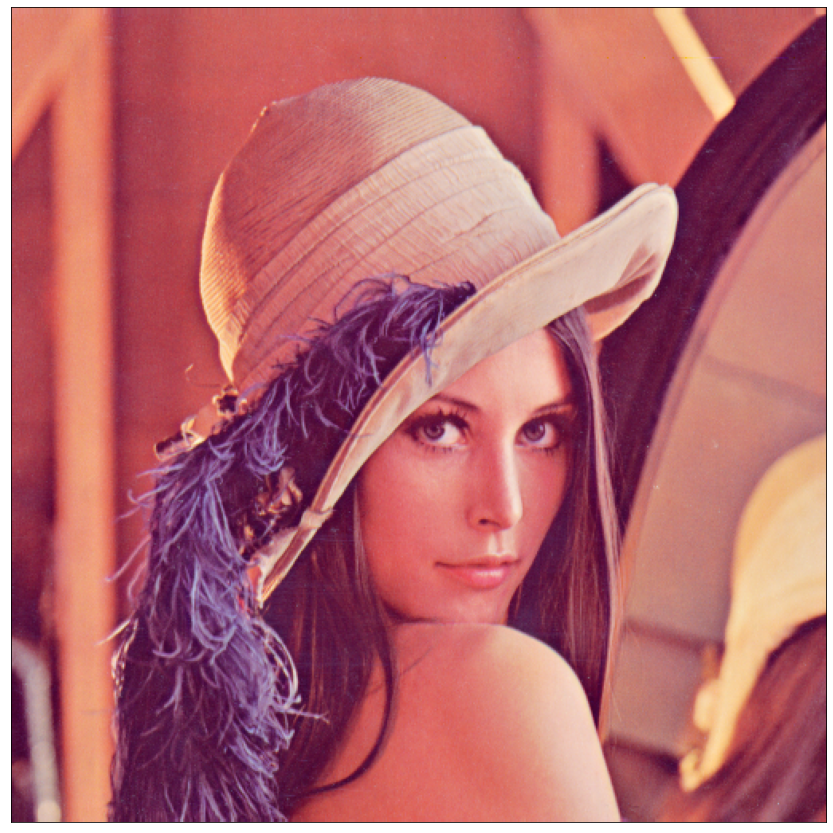

In [4]:
img = cv2.imread('lenna.png')
img = img[:, :, [2, 1, 0]]
showImage(img)

In [5]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 

block = 8

npImg = np.array(img);
print(img[:,:,0]);

#print(height)
# print(width)

print("Dimensions of image:")
print(img.shape)
# print(img)


[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]
Dimensions of image:
(512, 512, 3)


In [6]:
sliced = []
temp = []

#For each z dimension
for k in range(0,3,1):
    temp = []
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            
            #Making blocks of 2x2 from the matrix
            temp.append(img[currY:i, currX:j, k] - np.ones((8,8))*128) #appending blocks to a temporary array
            currX = j
        currY = i
        

        
    sliced.append(temp) #Appending temporary array to final array
    

In [7]:
dctSliced = []



for k in range(0,3,1):
    temp = []
    for x in sliced[k]:
        dctx = cv2.dct(x)
        y = cv2.idct(dctx)
        #print(x)
        #print("gap")
        #print(dctx)
        temp.append(dctx)
    dctSliced.append(temp)
    

print(dctSliced[0][0])


[[ 7.82750000e+02 -7.10081609e+00  8.15640312e+00  4.23828243e+00
  -1.75000000e+00 -3.59788316e+00 -1.21370839e+00  2.50910534e+00]
 [-1.50922848e+00  4.24728092e-01  4.74012062e-03  1.89611832e+00
   7.84361541e-01  1.24773589e+00 -3.35816833e+00 -8.67269852e-01]
 [-7.09324174e-01 -7.94963836e-01 -7.37436867e-01 -9.25819434e-01
  -1.35299025e-01 -2.06023709e-01  9.26776695e-01  1.01934611e+00]
 [ 2.68279562e+00  1.03579613e+00  1.36761868e+00  2.07955341e-01
  -4.84709651e-01 -4.63988370e-01  9.54900027e-01 -1.27566589e+00]
 [-3.25000000e+00 -9.24996293e-01 -1.49790468e+00 -2.48824251e-01
   7.50000000e-01  1.86000630e-01 -1.00313587e+00  1.55655778e+00]
 [ 2.39393161e+00  5.25665890e-01  1.12419673e+00  8.46671802e-01
  -6.24545078e-01  7.49151441e-01 -4.25436276e-01 -1.68907761e+00]
 [-1.05917856e+00 -1.17458377e-01 -5.73223305e-01 -1.28424429e+00
   3.26640741e-01 -1.43341641e+00  1.73743687e+00  1.48715034e+00]
 [ 2.09591370e-01 -5.66096804e-02  1.79297087e-01  9.77137842e-01
  -

In [8]:
selectedQMatrix = selectQMatrix("Q90")

quantSliced = []
print(selectedQMatrix)
for k in range(0,3,1):
    temp = []
    for x in dctSliced[k]:
        #print(x)
        x = np.round(x/selectedQMatrix)
        #print("gap")
        #print(x)
        temp.append(x)
        #print(x)
    quantSliced.append(temp)
    
#print("FInal")
print(quantSliced[0][0])


[[ 3  2  2  3  5  8 10 12]
 [ 2  2  3  4  5 12 12 11]
 [ 3  3  3  5  8 11 14 11]
 [ 3  3  4  6 10 17 16 12]
 [ 4  4  7 11 14 22 21 15]
 [ 5  7 11 13 16 12 23 18]
 [10 13 16 17 21 24 24 21]
 [14 18 19 20 22 20 20 20]]
[[261.  -4.   4.   1.  -0.  -0.  -0.   0.]
 [ -1.   0.   0.   0.   0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.   0.   0.]
 [  1.   0.   0.   0.  -0.  -0.   0.  -0.]
 [ -1.  -0.  -0.  -0.   0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.   0.  -0.   0.   0.]
 [  0.  -0.   0.   0.  -0.   0.  -0.  -0.]]


In [9]:
zigZagSliced = []
temp = []

for k in range(0,3,1):
    temp = []
    for x in quantSliced[k]:
        zList = zigZag(x)
#         print(zList)
        temp.append(zList)
    zigZagSliced.append(temp)
print(zigZagSliced[0][0])
        

[261.0, -4.0, -1.0, -0.0, 0.0, 4.0, 1.0, 0.0, -0.0, 1.0, -1.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0]


In [10]:
huffSliced = []

temp = []

for k in range(0,3,1):
    temp = []
    huffList = []
    for x in zigZagSliced[k]:
        temp = temp + x
    huffSliced.append(temp)
# print(huffSliced[0][0])

In [11]:
#huffSliced is a list consisting of 3 lists for 3 dimensions. Each list having 4096 elements.
#The 8x8 matrix lists have been merged and appended to each of the above lists.

encodedData = []
compress = HuffmanEncoding()


encodedData = compress.encodeData(huffSliced[0])
print(encodedData)

0111101011010011111101011011111000111001010111111111111111111111111111111111111111111111111111110000110110000000101001010110101011010101011101010101111111111111111111111111111111111111111111111101111001100100111001100100101001010101101011111111111111111111111111111111111111111111111111111000011011101010011100010100110010110010101110011010111111111111111111111111111111111111111111111111110111101011010011110010001101101000101011101011101011111111111111111111111111111111111111111111111111000001100010000011000111111001001011001011010101110101001111110011111111111111111111111111111111111111111111100001100000001000001110101101110011010011111111111010111111110101111111111111111111111111111111111110110000110000011110001100000011101000100010111000000100111001010010010010010111000101011111111110011111111111111111111111111111111111110000111011110000001001110101000010001110110110010011010100101011010100111111110101111111111111111111111111111111111110111100110011101111000100100010100101001101000110

In [12]:

encodedString = encodedData

extra_padding = 8 - len(encodedString) % 8
for i in range(extra_padding):
    encodedString += "0"

padded_info = "{0:08b}".format(extra_padding)
encodedString = padded_info + encodedString

# print(encodedString)

padded_encoded_text = encodedString


if(len(padded_encoded_text) % 8 != 0):
    print("Encoded text not padded properly")
    
data = bytearray()
for i in range(0, len(padded_encoded_text), 8):
    byte = padded_encoded_text[i:i+8]
    data.append(int(byte, 2))


print(data)


# filename =  "/home/rushil/Documents/Python/Image Processing/Compression/ci.bin"
# outfile = open(filename,'wb')
# outfile.write(bytes(b))
# outfile.close()

bytearray(b'\x08z\xd3\xf5\xbe9_\xff\xff\xff\xff\xff\xff\r\x80\xa5j\xd5u_\xff\xff\xff\xff\xff\xded\xe6JU\xaf\xff\xff\xff\xff\xff\xff\x86\xeaqL\xb2\xb9\xaf\xff\xff\xff\xff\xff\xfd\xebO#h\xae\xba\xff\xff\xff\xff\xff\xff\xc1\x881\xf9,\xb5u??\xff\xff\xff\xff\xfe\x18\x08:\xdc\xd3\xff\xaf\xf5\xff\xff\xff\xff\xec0x\xc0\xe8\x8b\x819I%\xc5\x7f\xe7\xff\xff\xff\xff\xc3\xbc\t\xd4#\xb6MJ\xd4\xff_\xff\xff\xff\xfe\xf3;\xc4\x8aSF\x91\xff\xf3\xff\xff\xff\xff\xe3Vj-k\x8aD\xd6N\xbf\xaf\xff\xff\xff\xfe\'\x07\x0e\xae\xd6r\xbf\xfa\xff\xff\xff\xff\xf7\x8c\xac\x97\x02d\xfd/\xff\xff\xff\xff\xff\xfb\x0ca\xae\xe2\xa7Z\xff\xff\xff\xff\xff\xff\x87$`\x16\x96\xb3\xae\xae_\xf5\xff\xff\xff\xff\xf1}\xb3%\xa9\xb5\xe9k\xcf3\xff\xff\xff\xff\xbd\xa4R6\xb9\x7f\xaf\xff?\xff\xff\xff\xf8X;L\xa4uuO\xff\xff\xff\xff\xff\xe1\xc8\x1c`\xf6\xdbv\x8b\xa7\xff\xff\xff\xff\xff\xfb\xdaF?*\xd6\xe8\xaf\xff\xcf\xff\xff\xff\xff\xbcn\xa4u;\xa9\xcb\x9f\xff\xff\xff\xff\xffx\xd5Z\x95\x14j\x91\xa3\xf9\xff\xff\xff\xff\xf7\x8d\x8e\xfd\xb6\xa3\xeaQ\xf

In [13]:
mem = FileStorage()
tree = compress.huffmanEncoding(huffSliced[0])

enc = mem.serialize(tree)
print(enc)

['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', 30.0, '#', 48.0, 211.0, '#', '#', '#', 177.0, 121.0, '#', 278.0, 153.0, '#', '#', 184.0, 265.0, '#', 268.0, 107.0, '#', '#', '#', '#', '#', 137.0, 311.0, '#', -112.0, 100.0, -45.0, '#', '#', '#', -105.0, 143.0, '#', '#', -113.0, -138.0, '#', -141.0, 310.0, '#', '#', 106.0, 104.0, '#', -114.0, 309.0, '#', '#', -93.0, 260.0, '#', -72.0, -53.0, '#', '#', '#', '#', '#', -81.0, 112.0, '#', 84.0, 286.0, '#', '#', -77.0, 82.0, '#', 290.0, 67.0, '#', '#', '#', 301.0, -102.0, '#', '#', '#', -135.0, -139.0, '#', 110.0, -128.0, '#', '#', 95.0, -100.0, '#', -126.0, -124.0, '#', '#', 223.0, 78.0, '#', 293.0, 287.0, '#', '#', '#', '#', 160.0, 191.0, '#', 89.0, 188.0, '#', 247.0, 217.0, 19.0, -6.0, '#', 6.0, '#', '#', '#', '#', '#', 51.0, -47.0, '#', '#', 281.0, '#', 274.0, 303.0, 50.0, -20.0, -14.0, 9.0, '#', '#', '#', '#', 13.0, '#', '#', 33.0, '#', 52.0, 258.0, '#', '#', '#', 165.0, 185.0, '#', -96.0, 138.0, '#', '#', 178.0, 175.0, '#', 236.0

In [14]:
#Adding Tree to File


filename = "out.bin"
outfile = open(filename,'wb')
        
for ele in enc:
    if isinstance(ele, str):
        outfile.write(bytes(ele, 'utf8'))
    else:
        byte = struct.pack('f', ele)
        outfile.write(byte)


outfile.write(bytes('*','utf8'))

1

In [15]:
#Adding Data to File 
outfile.write(bytes(data))

outfile.close()

In [16]:
# Reading Tree from File

infile = open(filename, "rb")
inTree = []
last_pos = 0
byte = infile.read(1)
if byte == b'#':
    inTree.append(byte.decode('utf8'))
else:
    infile.seek(last_pos)
    byte = infile.read(4)
    byte = struct.unpack('f', byte)
    inTree.append(byte)
    
while True:
    
    last_pos = infile.tell()
    byte = infile.read(1)
    
    if byte == b'*':
        break
    elif byte == b'#':
        inTree.append(byte.decode('utf8'))        
    else:
        if len(inTree) == len(enc):
            break
        infile.seek(last_pos)
        byte = infile.read(4)
        byte = struct.unpack('f', byte)
        inTree.append(byte[0])
        
infile.close()

In [17]:
print(len(inTree))
print(len(enc))
print(inTree)
print(enc)

983
983
['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', 30.0, '#', 48.0, 211.0, '#', '#', '#', 177.0, 121.0, '#', 278.0, 153.0, '#', '#', 184.0, 265.0, '#', 268.0, 107.0, '#', '#', '#', '#', '#', 137.0, 311.0, '#', -112.0, 100.0, -45.0, '#', '#', '#', -105.0, 143.0, '#', '#', -113.0, -138.0, '#', -141.0, 310.0, '#', '#', 106.0, 104.0, '#', -114.0, 309.0, '#', '#', -93.0, 260.0, '#', -72.0, -53.0, '#', '#', '#', '#', '#', -81.0, 112.0, '#', 84.0, 286.0, '#', '#', -77.0, 82.0, '#', 290.0, 67.0, '#', '#', '#', 301.0, -102.0, '#', '#', '#', -135.0, -139.0, '#', 110.0, -128.0, '#', '#', 95.0, -100.0, '#', -126.0, -124.0, '#', '#', 223.0, 78.0, '#', 293.0, 287.0, '#', '#', '#', '#', 160.0, 191.0, '#', 89.0, 188.0, '#', 247.0, 217.0, 19.0, -6.0, '#', 6.0, '#', '#', '#', '#', '#', 51.0, -47.0, '#', '#', 281.0, '#', 274.0, 303.0, 50.0, -20.0, -14.0, 9.0, '#', '#', '#', '#', 13.0, '#', '#', 33.0, '#', 52.0, 258.0, '#', '#', '#', 165.0, 185.0, '#', -96.0, 138.0, '#', '#', 178.0, 175.0, '#

In [18]:
# infile = open(filename, 'rb')

# inTree = []

# byte = infile.read(1)
# byte = byte.decode('utf8')
# inTree.append(byte)
# while(byte != '*'):
#     byte = infile.read(1)
#     byte = byte.decode('utf8')
#     inTree.append(byte)

# print(inTree)

In [19]:

# bitString = ""
# byte = infile.read(1)
# while(byte != b''):
#     byte = ord(byte)
#     bits = bin(byte)[2:].rjust(8, '0')
#     bitString += bits
#     byte = infile.read(1)
    
# print(bitString)

In [20]:
# bitString = padded_encoded_text

# padded_info = padded_encoded_text[:8]
# extra_padding = int(padded_info, 2)

# padded_encoded_text = padded_encoded_text[8:] 
# encoded_text = padded_encoded_text[:-1*extra_padding]

# print(encoded_text)

In [21]:
# import functools

# #Need to store tree in the file as well
# tree = compress.huffmanEncoding(huffSliced[0])

# origData = []

# ref = tree


# for bit in encoded_text:
#     if(bit == '0'):
#         ref = ref.left
#     else:
#         ref = ref.right
#     if(ref.value != None):
#         origData.append(ref.value)
#         ref = tree

# # print(origData)


# if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, huffSliced[0], origData), True) :  
#     print ("The lists are identical") 
# else : 
#     print ("The lists are not identical") 

In [22]:
#Storing files, not succedded yet

#Store files in this cell

#huffSlice is a list consisting of 3 lists(for 3 dimensions) and each list has 4096(number subjective to image dimensions) elements 
#Each of these 4096 elements in all the 3 lists are itself lists having another list of symbols and dictionary
#Try storing these...

# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'w')

# for k in range(0,3,1):
#     temp = []
#     temp = huffSliced[k]
#     print(len(temp))
#     for i in temp:
#         huffList = i
#         print(huffList[0])
#         str = ""
#         for j in huffList[0]:
# #             print(type(j))
#             str = str + j
#         print(str)
#         outfile.write(str)
            
# outfile.close()     








# import json


# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'w')
# json.dump(huffSliced,outfile)
# outfile.close()


In [23]:

#Of no use....

# npCompImg =np.zeros((len(img[:,:,0]),len(img[:,:,0][0]), 3) )


# for k in range(0,3,1):
#     compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
    
#     index = 0
#     currY = 0 #current Y index
#     for i in range(block,height+1,block):
#         currX = 0 #current X index
#         for j in range(block,width+1,block):
#             compressedImg[currY:i, currX:j] = quantSliced[k][index]
#             index = index+1
#             currX = j
#         currY = i
#     npCompImg[:,:,k] = compressedImg

# print(npCompImg[0][0])




# print("Compressed")
# showImage(npCompImg)







# # cv2.imwrite('/home/rushil/Documents/Academics/Image Processing/Image Processing/compressedlenna.png',npCompImg)

# # print("Original")
# # showImage(img)

# import pickle


# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'wb')
# pickle.dump(npCompImg,outfile)
# outfile.close()





In [24]:

#Of no use as of right now ....just store files for time being.....
# for k in range(0,3,1):
#     index = 0
#     currY = 0 #current Y index
#     for i in range(block,height+1,block):
#         currX = 0 #current X index
#         for j in range(block,width+1,block):
#             tempMat = npCompImg[currY:i, currX:j,k]
#             print(tempMat)
#             index = index+1
#             currX = j
#         currY = i

